In [1]:
#NLP for Disaster Tweets

The overall purpose of this code is to demonstrate the process of preparing text data, training machine learning models (logistic regression) and deep learning models (sequential neural network), and evaluating their performance on a binary classification task. It also covers text preprocessing and word embeddings using Word2Vec, which are essential steps in many NLP applications.

1.Importing Libraries

Importing necessary libraries for data manipulation, machine learning, natural language processing, and visualization.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import seaborn as sns
import matplotlib.pyplot as plt

2.Loading and Displaying Data

Load and display the content of two CSV files, which are typically used for building and evaluating machine learning models.

In [3]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

print("Train Data:")
print(train_df.head())
print("\nTest Data:")
print(test_df.head())

Train Data:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Test Data:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiw

3.Target Labels Distribution Visualization

Visualizing the distribution of target labels in the training dataset using a bar plot

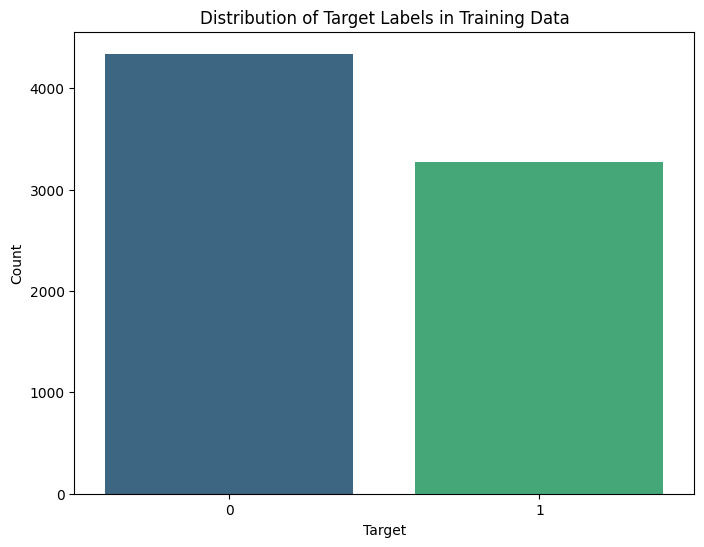

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_df, palette='viridis')
plt.title('Distribution of Target Labels in Training Data')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


4.Text Preprocessing

Perform common text preprocessing steps, such as tokenization, lowercase conversion, and stopwords removal, to prepare the text data for further natural language processing or machine learning tasks.

In [5]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

5.Word Embeddings with Word2Vec
 
Training a Word2Vec model on the preprocessed text data. Saving the trained Word2Vec model for later use in word embedding-based NLP tasks

In [6]:
word2vec_model = Word2Vec(sentences=train_df['processed_text'].apply(lambda x: x.split()),
                          vector_size=500, window=4, min_count=1, workers=5)

word2vec_model.save("word2vec_model")

6.Word Embedding Extraction

Calculating word embeddings for the processed text data in both the training and test datasets using a pre-trained Word2Vec model. These word embeddings can be used as numerical representations of the text data in machine learning models for various NLP tasks.

In [7]:
def get_word_embedding(text):
    embedding = np.zeros(500)
    count = 0
    for word in text.split():
        if word in word2vec_model.wv:
            embedding += word2vec_model.wv[word]
            count += 1
    if count != 0:
        embedding /= count
    return embedding

train_df['word_embedding'] = train_df['processed_text'].apply(get_word_embedding)
test_df['word_embedding'] = test_df['processed_text'].apply(get_word_embedding)

7.Data Preparation and Logistic Regression Model Training

Preparing the data by converting word embeddings and labels into NumPy arrays, splits the data into training and validation sets, and trains a logistic regression model on the training data to make predictions.

In [8]:
X = np.array(train_df['word_embedding'].to_list())
y = np.array(train_df['target'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(C=1.0,random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

8.Evaluating Logistic Regression Model Performance

Evaluating the logistic regression model's performance on the validation data, including accuracy and a detailed classification report, which helps assess how well the model is performing on the task of classifying the text data.

In [9]:
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71       874
           1       0.56      0.27      0.36       649

    accuracy                           0.60      1523
   macro avg       0.58      0.55      0.53      1523
weighted avg       0.59      0.60      0.56      1523



9.Sequential Neural Network Model

Building and training a sequential neural network model for text classification using Keras.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['processed_text'])

sequences = tokenizer.texts_to_sequences(train_df['processed_text'])
X_seq = pad_sequences(sequences, maxlen=50)  

X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(X_seq, y, test_size=0.2, random_state=42)

model_seq = Sequential()
model_seq.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=25))
model_seq.add(LSTM(25, dropout=0.4, recurrent_dropout=0.4))
model_seq.add(Dense(1, activation='sigmoid'))

model_seq.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_seq.fit(X_train_seq, y_train_seq, epochs=3, batch_size=64, validation_data=(X_val_seq, y_val_seq))


2024-08-21 13:35:08.996106: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 13:35:08.996247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 13:35:09.169470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5563 - loss: 0.6780 - val_accuracy: 0.6953 - val_loss: 0.6160
Epoch 2/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7260 - loss: 0.5688 - val_accuracy: 0.7833 - val_loss: 0.4728
Epoch 3/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8418 - loss: 0.3791 - val_accuracy: 0.7886 - val_loss: 0.4613


10.Evaluating Sequential Neural Network Model Performance

Evaluating the performance of the previously trained sequential neural network model on a validation set.

In [11]:
sequences_test = tokenizer.texts_to_sequences(test_df['processed_text'])
X_test_seq = pad_sequences(sequences_test, maxlen=50)


loss_val, accuracy_val = model_seq.evaluate(X_val_seq, y_val_seq)
print(f"Sequential Model Accuracy on Validation Set: {accuracy_val:.2f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7861 - loss: 0.4783
Sequential Model Accuracy on Validation Set: 0.79


11.Test Set Prediction and Submission

Make predictions on the test set and create a submission file.

In [12]:
test_predictions_seq = [0 if val < 0.5 else 1 for val in model_seq.predict(X_test_seq)]

submission_df_seq = pd.DataFrame({'id': test_df['id'], 'target': test_predictions_seq})

submission_df_seq.to_csv("submission.csv", index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
